# Weakly Coupled Frictional Oscillators

### Import necessary packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint

### Make sure images are big

In [87]:
dpi = 180
mpl.rcParams['figure.dpi'] = dpi

### Equations of motion for frictionally coupled oscillators are:
### \begin{align*}
    \ddot{x}_1 &= -x_1 - \beta(\dot{x}_1 + \dot{x}_2) \\
    \ddot{x}_2 &= -x_2 - \beta(\dot{x}_1 + \dot{x}_2)
\end{align*}
### Can make these into four first-order ODEs as
### \begin{align*}
    \dot{v}_1 &= -x_1 - \beta(\dot{x}_1 + \dot{x}_2) \\
    \dot{v}_2 &= -x_2 - \beta(\dot{x}_1 + \dot{x}_2) \\
    \dot{x}_1 &= v_1 \\
    \dot{x}_2 &= v_2
\end{align*}
### Vectorize as
### \begin{align*}
    \vec{x} = \left[ \begin{matrix} x_1 \\ x_2 \\ v_1 \\ v_2
                     \end{matrix} \right]
\end{align*}

### Encode these into functions

In [8]:
def eqm(x, t, B):
    dd_x1 = -x[0] - B*(x[2] + x[3])
    dd_x2 = -x[1] - B*(x[2] + x[3])
    return [x[2], x[3], dd_x1, dd_x2]

### Solve for various values of $\beta$ and plot

In [63]:
def runSimulation(x0, beta, num_periods=5):
    
    # Make timesteps, run simulatin
    t = np.linspace(0, num_periods*(2*np.pi), num=1000)
    sol = odeint(eqm, x0, t, (beta,))

    # Plot x1, x2
    x1 = sol[:, 0]
    x2 = sol[:, 1]
    fig, ax = plt.subplots(1)
    ax.plot(t, x1, label=r'$x_1$')
    ax.plot(t, -x2, label=r'$-x_2$')

    # Make plot pretty
    ax.legend()
    title = r'$x_1$ and $-x_2$ vs. $\overline{t}$ for $\beta = $' + str(beta)
    ax.set_title(title)
    ax.set_xlabel(r'$\overline{t}$')
    ax.set_ylabel(r'Amplitude')
    
    return fig

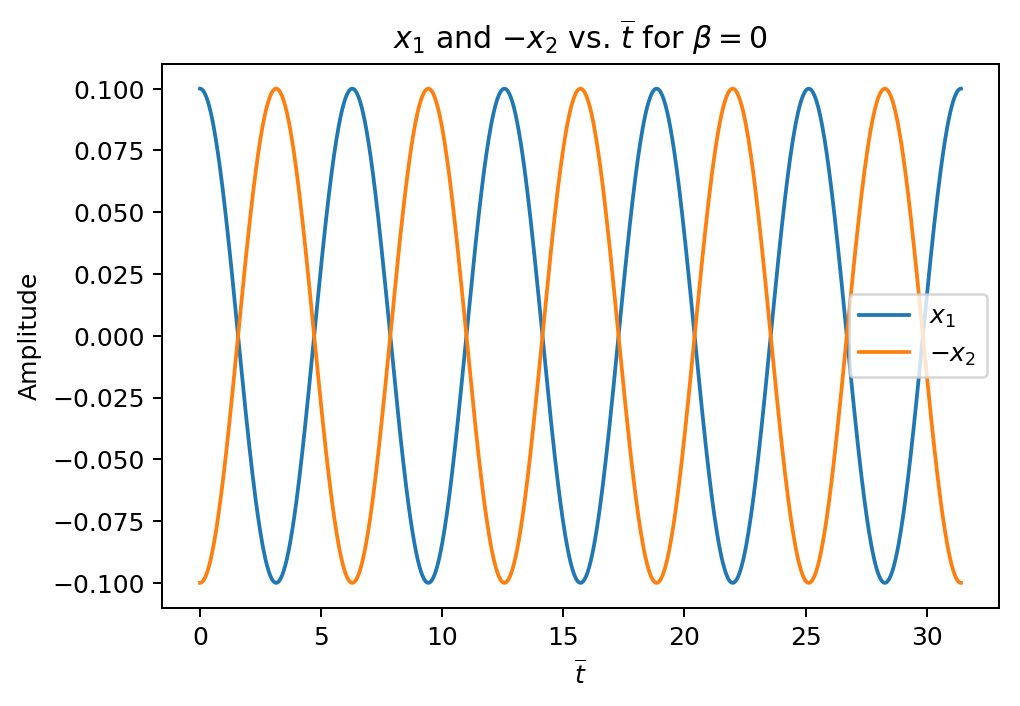

In [97]:
x0 = [0.1, 0.1, 0, 0]
beta = 0
fig = runSimulation(x0, beta)
filename = "12_6_Figures\\NoCoupling.png"
fig.savefig(filename, bbox_inches='tight')

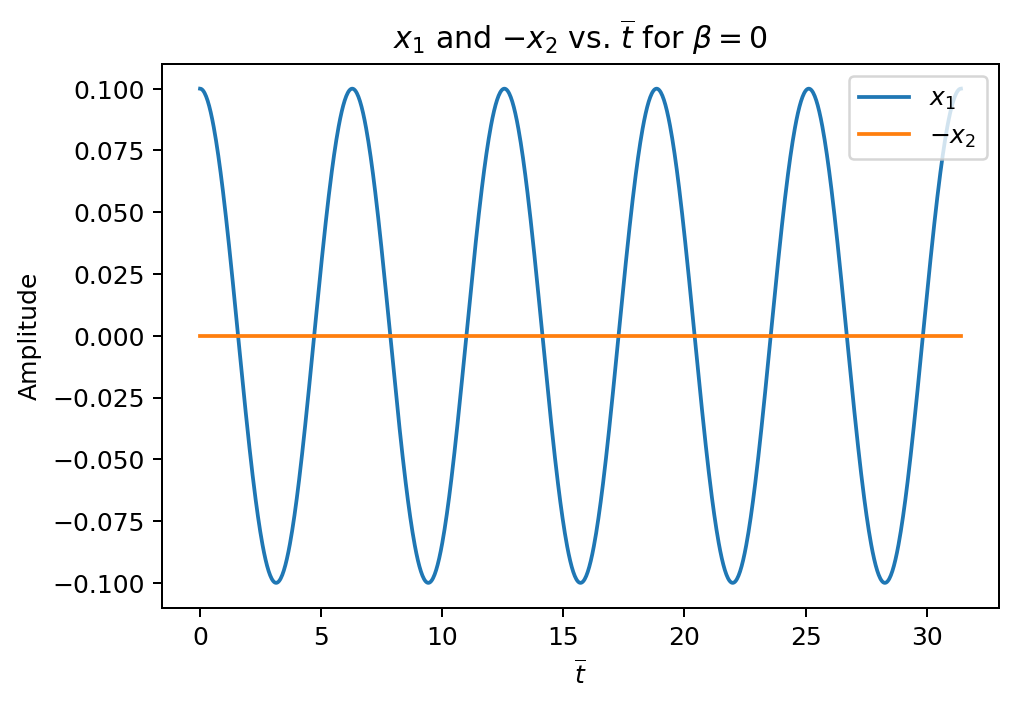

In [98]:
x0 = [0.1, 0, 0, 0]
beta = 0
fig = runSimulation(x0, beta)
filename = "12_6_Figures\\NoCouplingStationary.png"
fig.savefig(filename, bbox_inches='tight')

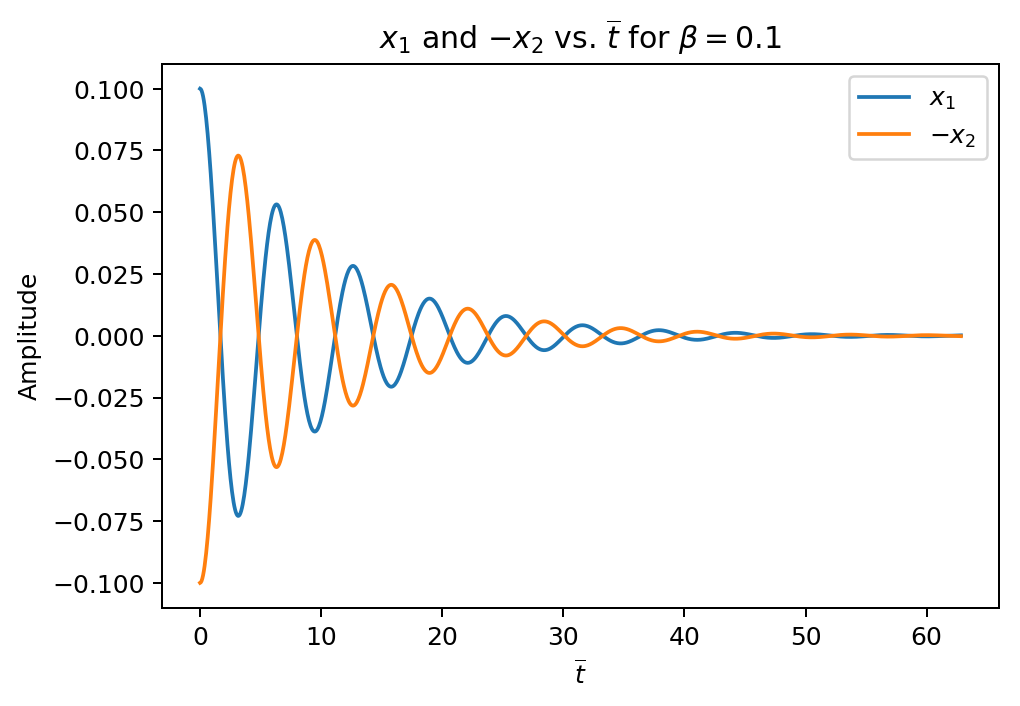

In [99]:
x0 = [0.1, 0.1, 0, 0]
beta = 0.1
fig = runSimulation(x0, beta, num_periods=10)
filename = "12_6_Figures\\CouplingOpposite.png"
fig.savefig(filename, bbox_inches='tight')

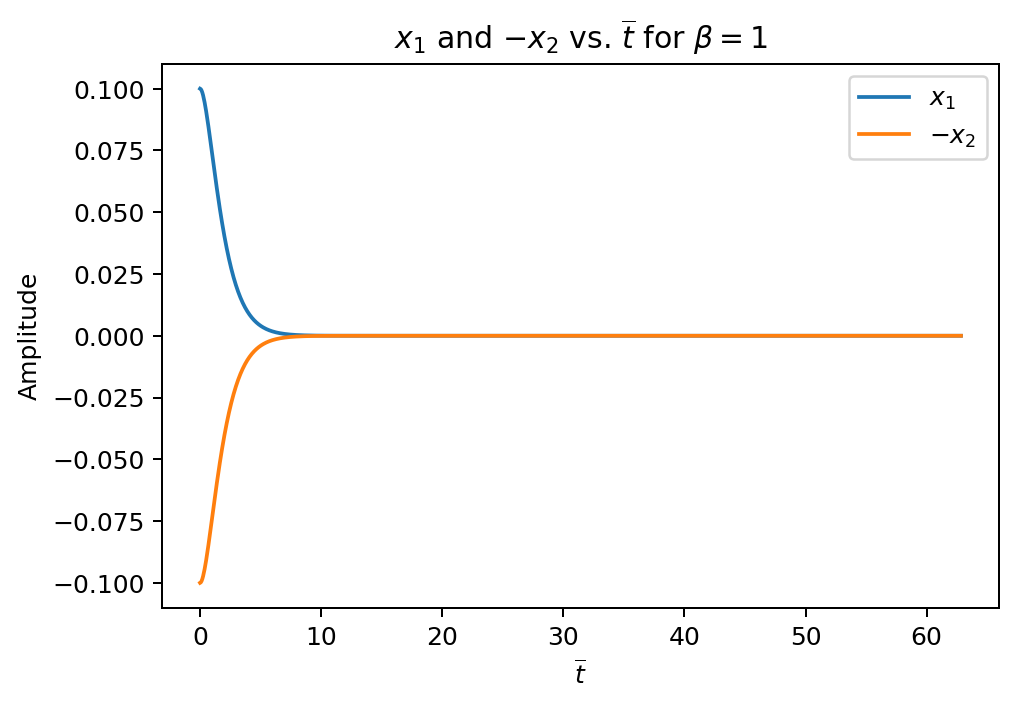

In [100]:
x0 = [0.1, 0.1, 0, 0]
beta = 1
fig = runSimulation(x0, beta, num_periods=10)
filename = "12_6_Figures\\StrongCouplingOpposite.png"
fig.savefig(filename, bbox_inches='tight')

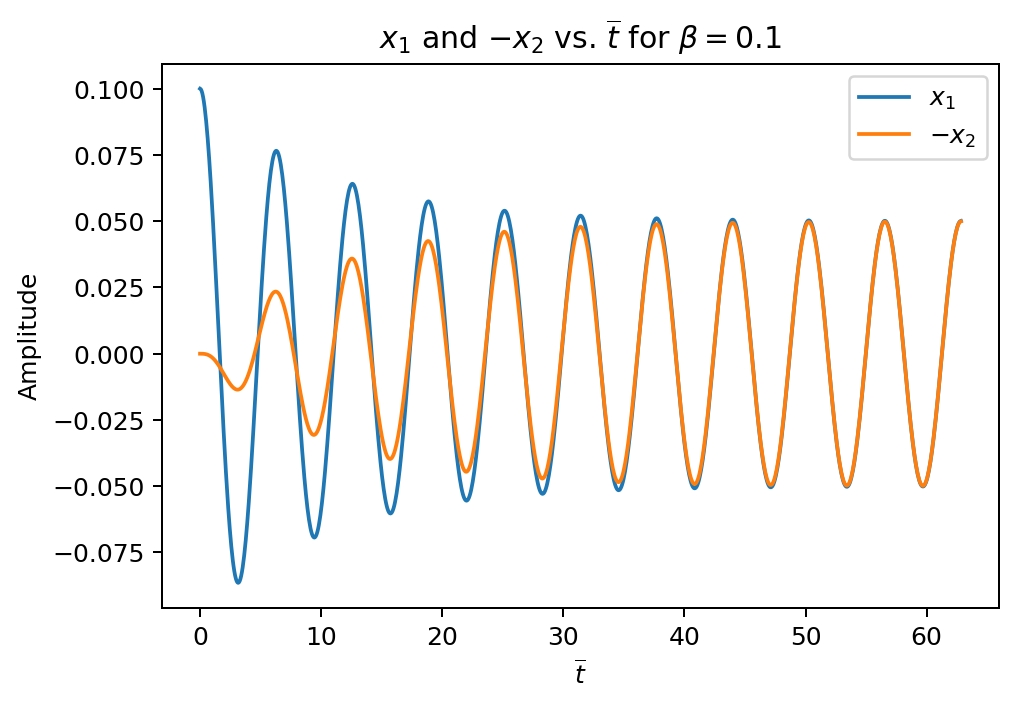

In [101]:
x0 = [0.1, 0, 0, 0]
beta = 0.1
fig = runSimulation(x0, beta, num_periods=10)
filename = "12_6_Figures\\CouplingSingle.png"
fig.savefig(filename, bbox_inches='tight')

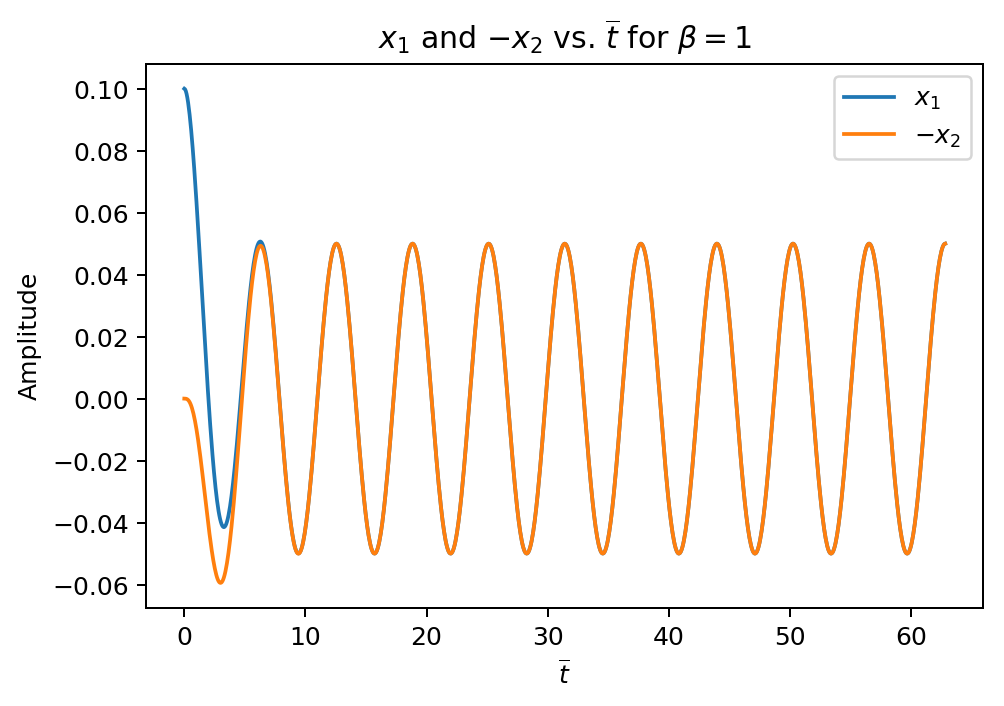

In [102]:
x0 = [0.1, 0, 0, 0]
beta = 1
fig = runSimulation(x0, beta, num_periods=10)
filename = "12_6_Figures\\StrongCouplingSingle.png"
fig.savefig(filename, bbox_inches='tight')

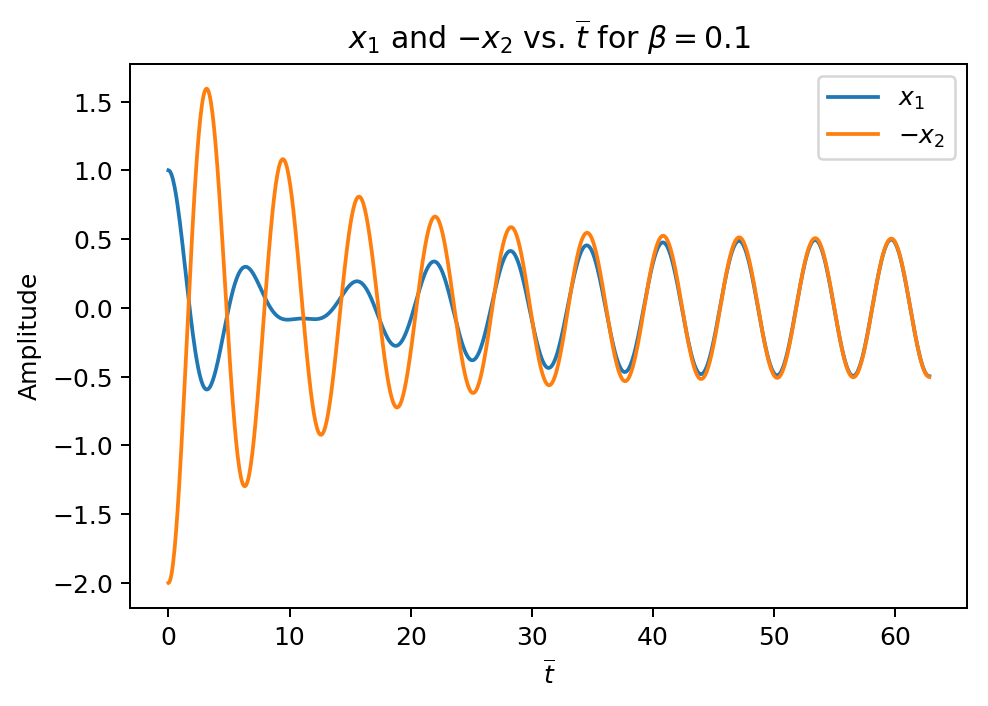

In [103]:
x0 = [1, 2, 0, 0]
beta = 0.1
fig = runSimulation(x0, beta, num_periods=10)
filename = "12_6_Figures\\CouplingDouble.png"
fig.savefig(filename, bbox_inches='tight')